# GluonTS - Transfer Learning Approach (quarterly) 

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_yearly_atm`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_yearly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [1]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [3]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [4]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [5]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [6]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [7]:
dataname_a = "m4_yearly"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.


23000

In [8]:
dataname_b1 = "m4_yearly_industry"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.


3716

In [9]:
dataname_b2 = "m4_yearly_finance"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.


6519

In [10]:
dataname_b3 = "m4_yearly_demographic"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_demographic.


1088

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 23000
length test: 23000

start:
 1750-01-31 00:00:00
target:
 [5172.1 5133.5 5186.9 5084.6 5182.  5414.3 5576.2 5752.9 5955.2 6087.8]
feat_static_cat:
 [0]


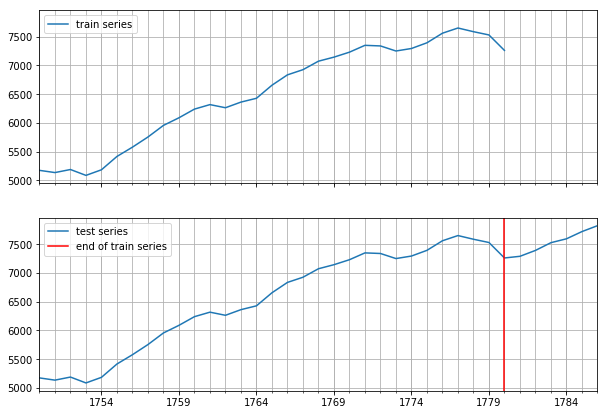

In [11]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 1088
length test: 1088

start:
 1750-01-31 00:00:00
target:
 [3769.9 3559.  3272.4 2944.5 3094.  3423.8 3557.7 3859.9 3970.1 3832.2]
feat_static_cat:
 [1]


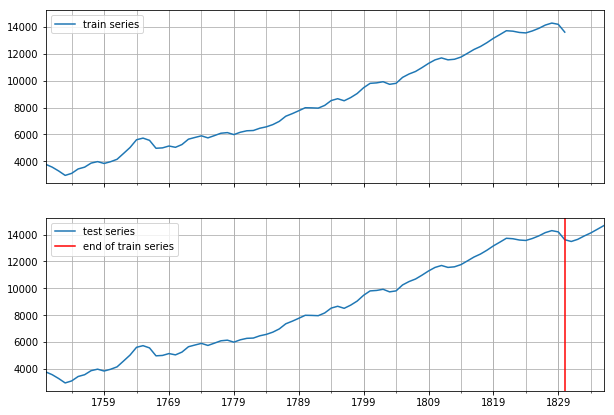

In [12]:
dataset_b = dataset_b3

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [13]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [14]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [15]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='12M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='23000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=6), train=<gluonts.dataset.common.FileDataset object at 0x7f2f18b997b8>, test=<gluonts.dataset.common.FileDataset object at 0x7f2f18b3e358>)

 TrainDatasets(metadata=MetaData(freq='12M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='1088')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=6), train=<gluonts.dataset.common.FileDataset object at 0x7f2f18b51240>, test=<gluonts.dataset.common.FileDataset object at 0x7f2f18b3ec50>)


In [16]:
print(dataname_a)
print(dataname_b1)

m4_yearly
m4_yearly_industry


In [17]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [18]:
print(dataname_a)
print(dataname_b1)

m4_yearly
m4_yearly_industry


## Study 4: `m4_yearly` vs. `m4_yearly_industry`

In [19]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 50/50 [00:01<00:00, 36.53it/s, avg_epoch_loss=8.5]
INFO:root:Epoch[0] Elapsed time 1.376 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.504471
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.00it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 1.286 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.886298
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.42it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[2] Elapsed time 1.214 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.110143
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.94it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[3] Elapsed time 1.199 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.389315
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.42it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[4] Elapsed time 1.243 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 49.86it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[37] Elapsed time 1.010 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.376101
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.59it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[38] Elapsed time 1.126 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.207918
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 46.01it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 1.093 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.731974
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.16it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 1.222 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.960153
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.56it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[41] Elapsed time 1.103 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.037563
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 45.55it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[74] Elapsed time 1.104 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.026823
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 48.79it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[75] Elapsed time 1.030 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.097772
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.74it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 1.126 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.450733
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 48.02it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 1.047 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.128091
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.704776  0.20559  106.46519            0.188851            0.121415    42   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 43


100%|██████████| 50/50 [00:01<00:00, 36.43it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 1.379 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.361025
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.88it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 1.293 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.887139
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.06it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[2] Elapsed time 1.195 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.117778
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.11it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 1.253 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.468842
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.52it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[4] Elapsed time 1.238 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 48.44it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[37] Elapsed time 1.039 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.516047
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.74it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[38] Elapsed time 1.200 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.276766
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.29it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 1.191 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.862285
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.38it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[40] Elapsed time 1.243 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.148069
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.09it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[41] Elapsed time 1.139 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.025125
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.14it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[74] Elapsed time 1.195 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.142846
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.30it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 1.190 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.197944
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.24it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 1.189 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.675696
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.56it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[77] Elapsed time 1.126 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.257240
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.377054  0.203522  97.793714            0.184226            0.134843   

   seed  epochs  num_batches train data           eval data  
0    43     100           50  m4_yearly  m4_yearly_industry  
Next seed: 44


100%|██████████| 50/50 [00:01<00:00, 34.13it/s, avg_epoch_loss=8.39]
INFO:root:Epoch[0] Elapsed time 1.470 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.390623
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.35it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[1] Elapsed time 1.274 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.837493
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.48it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 1.214 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.131030
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.76it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 1.204 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.474072
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.86it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[4] Elapsed time 1.230 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 45.54it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[37] Elapsed time 1.107 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.535886
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.47it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[38] Elapsed time 1.060 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.199467
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.63it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[39] Elapsed time 1.206 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.890546
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.04it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 1.225 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.893149
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.01it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 1.116 seconds
I

100%|██████████| 50/50 [00:01<00:00, 46.99it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[73] Elapsed time 1.067 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.040508
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 53.62it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[74] Elapsed time 0.940 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.140932
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 45.60it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[75] Elapsed time 1.106 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.139855
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 47.83it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[76] Elapsed time 1.053 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.468960
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 39.22it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[77] Elapsed time 1.283 seconds
INFO:roo

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.644356  0.18201  68.096264            0.167096            0.125277    44   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 45


100%|██████████| 50/50 [00:01<00:00, 33.93it/s, avg_epoch_loss=8.35]
INFO:root:Epoch[0] Elapsed time 1.478 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.351627
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.93it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[1] Elapsed time 1.259 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.021420
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.60it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[2] Elapsed time 1.153 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.218781
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.25it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[3] Elapsed time 1.223 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.558501
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.15it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[4] Elapsed time 1.194 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 45.05it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[37] Elapsed time 1.115 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.663585
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 50.03it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[38] Elapsed time 1.008 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.352268
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.88it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 1.173 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.060494
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.35it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 1.110 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.071069
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.96it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[41] Elapsed time 1.092 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.073140
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.99it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[74] Elapsed time 1.119 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.169389
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 43.30it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 1.159 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.203270
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.31it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[76] Elapsed time 1.188 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.642127
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.46it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[77] Elapsed time 1.241 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.315003
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.786949  0.189811  76.911849            0.177737            0.131556   

   seed  epochs  num_batches train data           eval data  
0    45     100           50  m4_yearly  m4_yearly_industry  
Next seed: 46


100%|██████████| 50/50 [00:01<00:00, 36.09it/s, avg_epoch_loss=8.45]
INFO:root:Epoch[0] Elapsed time 1.389 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.454084
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.27it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[1] Elapsed time 1.249 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.777933
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.01it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 1.228 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.099694
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.11it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 1.194 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.469341
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.78it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[4] Elapsed time 1.232 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 47.24it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[37] Elapsed time 1.065 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.572787
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.53it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[38] Elapsed time 1.057 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.222297
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.86it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[39] Elapsed time 1.092 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.835304
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.27it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 1.106 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.937070
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.25it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[41] Elapsed time 1.159 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.144706
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[74] Elapsed time 1.250 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.354326
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 38.74it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[75] Elapsed time 1.293 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.107741
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 36.40it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[76] Elapsed time 1.378 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.508827
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.68it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[77] Elapsed time 1.234 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.150474
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.060598  0.190311  70.311063            0.174663            0.118757   

   seed  epochs  num_batches train data           eval data  
0    46     100           50  m4_yearly  m4_yearly_industry  
Next seed: 47


100%|██████████| 50/50 [00:01<00:00, 37.68it/s, avg_epoch_loss=8.3]
INFO:root:Epoch[0] Elapsed time 1.332 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.300957
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.95it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[1] Elapsed time 1.322 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.953688
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.29it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 1.310 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.185384
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.46it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[3] Elapsed time 1.060 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.618228
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.64it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[4] Elapsed time 1.102 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 44.92it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[37] Elapsed time 1.122 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.542198
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.82it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[38] Elapsed time 1.053 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.310337
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.62it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 1.269 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.857199
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.65it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[40] Elapsed time 1.232 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.966600
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.76it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 1.097 seconds


100%|██████████| 50/50 [00:01<00:00, 42.33it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[73] Elapsed time 1.186 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.127231
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.37it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[74] Elapsed time 1.182 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.093835
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.30it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[75] Elapsed time 1.135 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.131638
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 38.18it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[76] Elapsed time 1.314 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.556375
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 38.79it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[77] Elapsed time 1.291 seconds
INFO:roo

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.817383  0.18516  65.956476             0.17236            0.120862    47   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 48


100%|██████████| 50/50 [00:01<00:00, 36.02it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 1.395 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.259591
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.78it/s, avg_epoch_loss=7.81]
INFO:root:Epoch[1] Elapsed time 1.294 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.809849
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.36it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 1.060 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.096091
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[3] Elapsed time 1.135 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.460881
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.66it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[4] Elapsed time 1.122 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 46.26it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[37] Elapsed time 1.089 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.604694
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 53.14it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[38] Elapsed time 0.946 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.310488
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.42it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[39] Elapsed time 1.128 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.830231
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.55it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 1.178 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.962990
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.43it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[41] Elapsed time 1.131 seconds
I

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.063190
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.73it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[74] Elapsed time 1.176 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.209669
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.57it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[75] Elapsed time 1.180 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.085264
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 37.12it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[76] Elapsed time 1.350 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.411025
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.11it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[77] Elapsed time 1.253 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.138513
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.502319  0.178744  64.99656            0.166709            0.125511    48   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 49


100%|██████████| 50/50 [00:01<00:00, 42.32it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[0] Elapsed time 1.184 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.047287
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.95it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[1] Elapsed time 1.174 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.824245
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 50.41it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 1.001 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.147297
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.78it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[3] Elapsed time 1.094 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.529483
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.36it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[4] Elapsed time 1.105 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 51.00it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[37] Elapsed time 0.989 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.662529
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 51.19it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[38] Elapsed time 0.982 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.508654
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 49.49it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[39] Elapsed time 1.012 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.264403
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 41.00it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[40] Elapsed time 1.224 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.157419
INFO:root:Epoch[41] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 47.83it/s, avg_epoch_loss

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.127874
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 43.43it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 1.159 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.301678
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.40it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 1.181 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.235435
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 37.96it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 1.327 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.847978
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 43.03it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[77] Elapsed time 1.169 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.381353
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.463532  0.208417  91.70052            0.187695            0.127211    49   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 50


100%|██████████| 50/50 [00:01<00:00, 40.45it/s, avg_epoch_loss=8.7]
INFO:root:Epoch[0] Elapsed time 1.239 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.698136
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.85it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[1] Elapsed time 1.173 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.967265
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.58it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[2] Elapsed time 1.154 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.261159
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 31.75it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[3] Elapsed time 1.587 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.563689
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.77it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[4] Elapsed time 1.363 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 47.07it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[37] Elapsed time 1.067 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.581845
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.31it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[38] Elapsed time 1.063 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.355415
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 1.138 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.056478
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.77it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 1.053 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.003124
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.61it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[41] Elapsed time 1.128 seconds
INF

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.167244
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.45it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[74] Elapsed time 1.242 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.716728
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.15it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[75] Elapsed time 1.192 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.126387
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.17it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[76] Elapsed time 1.195 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.293392
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 39.70it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[77] Elapsed time 1.263 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.030072
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.052526  0.19254  73.032281            0.174946            0.126963    50   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 51


100%|██████████| 50/50 [00:01<00:00, 36.88it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 1.360 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.266300
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.25it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[1] Elapsed time 1.354 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.862214
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.85it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 1.237 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.180719
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 48.72it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[3] Elapsed time 1.029 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.548719
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.30it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[4] Elapsed time 1.131 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 49.64it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[37] Elapsed time 1.012 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.420615
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 48.27it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[38] Elapsed time 1.042 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.273554
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.79it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 1.173 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.811695
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 46.41it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 1.079 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.068080
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.89it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[41] Elapsed time 1.116 seconds


100%|██████████| 50/50 [00:01<00:00, 40.36it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[73] Elapsed time 1.249 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.240384
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.58it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[74] Elapsed time 1.182 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.354566
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.19it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[75] Elapsed time 1.191 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.131544
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 41.78it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[76] Elapsed time 1.201 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.429161
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 38.58it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[77] Elapsed time 1.304 seconds
INFO:root

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.245806  0.199327  84.807345            0.180589            0.136895   

   seed  epochs  num_batches train data           eval data  
0    51     100           50  m4_yearly  m4_yearly_industry  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,4.704776,0.205590,106.465190,0.188851,0.121415,42,100,50,m4_yearly,m4_yearly_industry
0,4.377054,0.203522,97.793714,0.184226,0.134843,43,100,50,m4_yearly,m4_yearly_industry
0,3.644356,0.182010,68.096264,0.167096,0.125277,44,100,50,m4_yearly,m4_yearly_industry
0,3.786949,0.189811,76.911849,0.177737,0.131556,45,100,50,m4_yearly,m4_yearly_industry
0,4.060598,0.190311,70.311063,0.174663,0.118757,46,100,50,m4_yearly,m4_yearly_industry
0,3.817383,0.185160,65.956476,0.172360,0.120862,47,100,50,m4_yearly,m4_yearly_industry
0,3.502319,0.178744,64.996560,0.166709,0.125511,48,100,50,m4_yearly,m4_yearly_industry
0,4.463532,0.208417,91.700520,0.187695,0.127211,49,100,50,m4_yearly,m4_yearly_industry
0,4.052526,0.192540,73.032281,0.174946,0.126963,50,100,50,m4_yearly,m4_yearly_industry
0,4.245806,0.199327,84.807345,0.180589,0.136895,51,100,50,m4_yearly,m4_yearly_industry


In [20]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_industry", dataname_b="m4_yearly_industry", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 50/50 [00:01<00:00, 34.92it/s, avg_epoch_loss=8.62]
INFO:root:Epoch[0] Elapsed time 1.434 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.624942
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 48.36it/s, avg_epoch_loss=8.09]
INFO:root:Epoch[1] Elapsed time 1.037 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.092737
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.93it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 1.045 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.704741
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.44it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[3] Elapsed time 1.239 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.502602
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 48.45it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[4] Elapsed time 1.040 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.77it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[38] Elapsed time 1.054 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.942793
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.20it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[39] Elapsed time 1.090 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.253780
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.44it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 1.084 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.822650
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.55it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[41] Elapsed time 1.079 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.266370
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.46it/s, avg_epoch_loss=6.87]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 40.15it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 1.248 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.756056
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 42.87it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[76] Elapsed time 1.168 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.163396
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.30it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[77] Elapsed time 1.249 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.727853
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.74it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[78] Elapsed time 1.266 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.011543
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.38it/s, avg_epoch_loss=7.04

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.493607  0.176967  44.316679            0.164016            0.114487   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 43


100%|██████████| 50/50 [00:01<00:00, 40.41it/s, avg_epoch_loss=8.44]
INFO:root:Epoch[0] Elapsed time 1.241 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.444436
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.07it/s, avg_epoch_loss=8.01]
INFO:root:Epoch[1] Elapsed time 1.163 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.011217
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.82it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 1.200 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.704587
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.48it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[3] Elapsed time 1.239 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.618471
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.35it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[4] Elapsed time 1.156 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 40.41it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[37] Elapsed time 1.243 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.092938
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 39.14it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[38] Elapsed time 1.285 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.993499
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 41.83it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[39] Elapsed time 1.205 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.297252
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 38.65it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 1.296 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.889818
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.80it/s, avg_epoch_loss=7.42]


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.115672
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 43.08it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[74] Elapsed time 1.165 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.181833
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 39.44it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[75] Elapsed time 1.275 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.865714
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 39.37it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[76] Elapsed time 1.274 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.355054
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 38.67it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[77] Elapsed time 1.301 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.868900
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.615471  0.186372  52.126432            0.182078            0.137162   

   seed  epochs  num_batches          train data           eval data  
0    43     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 44


100%|██████████| 50/50 [00:01<00:00, 37.33it/s, avg_epoch_loss=8.47]
INFO:root:Epoch[0] Elapsed time 1.342 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.467833
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.03it/s, avg_epoch_loss=8.03]
INFO:root:Epoch[1] Elapsed time 1.196 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.032841
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.49it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[2] Elapsed time 1.241 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.760082
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.42it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[3] Elapsed time 1.275 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.622245
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.76it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[4] Elapsed time 1.203 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.87it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[38] Elapsed time 1.295 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.910973
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.93it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[39] Elapsed time 1.170 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.274310
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.36it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[40] Elapsed time 1.308 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.768707
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.48it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[41] Elapsed time 1.181 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.344236
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.10it/s, avg_epoch_loss=6.81]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.37it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 1.244 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.741903
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.15it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[76] Elapsed time 1.161 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.301239
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.48it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[77] Elapsed time 1.274 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.768706
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.59it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[78] Elapsed time 1.179 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.171470
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.20it/s, avg_epoch_loss=6.79]
INF

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.42467  0.175823  43.513753            0.163279            0.114401    44   

   epochs  num_batches          train data           eval data  
0     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 45


100%|██████████| 50/50 [00:01<00:00, 41.59it/s, avg_epoch_loss=8.42]
INFO:root:Epoch[0] Elapsed time 1.206 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.417479
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 50.28it/s, avg_epoch_loss=8.15]
INFO:root:Epoch[1] Elapsed time 0.998 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.151177
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.08it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[2] Elapsed time 1.253 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.844956
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.93it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 1.142 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.718907
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 53.89it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[4] Elapsed time 0.933 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.94it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[38] Elapsed time 1.224 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.058164
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.79it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[39] Elapsed time 1.150 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.201093
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.55it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 1.273 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.727077
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.24it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[41] Elapsed time 1.163 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.285093
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.65it/s, avg_epoch_loss=6.8]
INFO:root:Epoc

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.76it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[75] Elapsed time 1.263 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.675739
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.49it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[76] Elapsed time 1.181 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.300638
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.30it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[77] Elapsed time 1.278 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.730032
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.72it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 1.174 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.136454
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.84it/s, avg_epoch_loss=6.77]
INF

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.279436  0.173473  44.469064            0.161751             0.11702   

   seed  epochs  num_batches          train data           eval data  
0    45     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 46


100%|██████████| 50/50 [00:01<00:00, 40.15it/s, avg_epoch_loss=8.53]
INFO:root:Epoch[0] Elapsed time 1.257 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.531994
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.55it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 1.301 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.982663
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.68it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[2] Elapsed time 1.149 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.709245
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.79it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[3] Elapsed time 1.201 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.603986
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.39it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[4] Elapsed time 1.084 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.73it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[38] Elapsed time 1.206 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.961254
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.27it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[39] Elapsed time 1.135 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.303515
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.17it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[40] Elapsed time 1.330 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.837788
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.87it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[41] Elapsed time 1.201 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.214580
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.76it/s, avg_epoch_loss=6.85]
INFO:root:Epo

100%|██████████| 50/50 [00:01<00:00, 42.67it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[74] Elapsed time 1.176 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.225406
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 35.88it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 1.402 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.759995
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 41.34it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[76] Elapsed time 1.217 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.300352
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 36.50it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[77] Elapsed time 1.378 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.791638
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 39.38it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[78] Elapsed time 1.276 secon

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.324118  0.178321  47.526207            0.169491            0.126633   

   seed  epochs  num_batches          train data           eval data  
0    46     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 47


100%|██████████| 50/50 [00:01<00:00, 36.21it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 1.384 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.357821
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.99it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[1] Elapsed time 1.169 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.129828
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.68it/s, avg_epoch_loss=7.83]
INFO:root:Epoch[2] Elapsed time 1.205 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.834140
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.98it/s, avg_epoch_loss=7.8]
INFO:root:Epoch[3] Elapsed time 1.227 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.798436
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.03it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[4] Elapsed time 1.169 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.14it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[38] Elapsed time 1.285 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.919473
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.06it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[39] Elapsed time 1.142 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.292018
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.96it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[40] Elapsed time 1.440 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.810389
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.09it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[41] Elapsed time 1.193 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.207847
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.16it/s, avg_epoch_loss=6.87]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 49.05it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[74] Elapsed time 1.026 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.345033
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 42.18it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[75] Elapsed time 1.193 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.790833
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 44.45it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[76] Elapsed time 1.131 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.203485
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 47.37it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[77] Elapsed time 1.061 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.813801
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 46.62it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[78] Elapsed time 1.079 secon

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.653618  0.180854  45.937154            0.164916            0.117867   

   seed  epochs  num_batches          train data           eval data  
0    47     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 48


100%|██████████| 50/50 [00:01<00:00, 37.98it/s, avg_epoch_loss=8.41]
INFO:root:Epoch[0] Elapsed time 1.332 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.408433
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.17it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[1] Elapsed time 1.219 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.023614
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.31it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 1.248 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.732828
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.36it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[3] Elapsed time 1.275 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.606057
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.58it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[4] Elapsed time 1.179 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.30it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[38] Elapsed time 1.280 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.771103
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.23it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[39] Elapsed time 1.217 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.276617
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.72it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 1.299 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.822705
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.34it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[41] Elapsed time 1.160 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.107088
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.24it/s, avg_epoch_loss=6.88]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 38.47it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[75] Elapsed time 1.307 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.674839
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.72it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[76] Elapsed time 1.203 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.164601
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.34it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[77] Elapsed time 1.278 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.721751
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.90it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[78] Elapsed time 1.291 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.992501
INFO:root:Epoch[79] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.47it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[79] Elapsed time 1.208 seconds
INFO:roo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.827037  0.183455  38.777238            0.171414            0.114492   

   seed  epochs  num_batches          train data           eval data  
0    48     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 49


100%|██████████| 50/50 [00:01<00:00, 39.29it/s, avg_epoch_loss=8.23]
INFO:root:Epoch[0] Elapsed time 1.275 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.227994
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.71it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 1.207 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.978856
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.69it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 1.177 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.752530
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.46it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 1.274 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.716641
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.67it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[4] Elapsed time 1.267 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.28it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[38] Elapsed time 1.278 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.029188
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.69it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[39] Elapsed time 1.236 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.252992
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.26it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[40] Elapsed time 1.347 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.812528
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.19it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[41] Elapsed time 1.216 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.334090
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.76it/s, avg_epoch_loss=6.85]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 39.86it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[75] Elapsed time 1.262 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.790672
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.80it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[76] Elapsed time 1.176 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.245015
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.15it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[77] Elapsed time 1.350 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.799638
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.07it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[78] Elapsed time 1.220 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.203304
INFO:root:Epoch[79] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.54it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[79] Elapsed time 1.274 seconds
INFO:root:

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.75892  0.191744  53.266859            0.184901            0.135684    49   

   epochs  num_batches          train data           eval data  
0     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 50


100%|██████████| 50/50 [00:01<00:00, 37.48it/s, avg_epoch_loss=8.68]
INFO:root:Epoch[0] Elapsed time 1.340 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.684117
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.59it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[1] Elapsed time 1.154 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.118492
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.36it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[2] Elapsed time 1.215 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.820873
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.93it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[3] Elapsed time 1.258 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.728070
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.96it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[4] Elapsed time 1.142 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.29it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[38] Elapsed time 1.111 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.899808
INFO:root:Loading parameters from best epoch (28)
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 45.43it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[39] Elapsed time 1.109 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.362832
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 45.92it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[40] Elapsed time 1.095 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.880988
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 43.15it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[41] Elapsed time 1.167 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.171643
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 50/50 [00:0

100%|██████████| 50/50 [00:01<00:00, 44.27it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[74] Elapsed time 1.138 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.343868
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 43.63it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 1.154 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.800238
INFO:root:Loading parameters from best epoch (45)
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 43.66it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[76] Elapsed time 1.153 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.229092
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 41.98it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[77] Elapsed time 1.196 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.829621
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 45.48it/s, avg_epoch_loss=

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.31245  0.174879  45.631855            0.164308            0.119786    50   

   epochs  num_batches          train data           eval data  
0     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 51


100%|██████████| 50/50 [00:01<00:00, 38.36it/s, avg_epoch_loss=8.34]
INFO:root:Epoch[0] Elapsed time 1.309 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.340472
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.76it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[1] Elapsed time 1.202 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.067526
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.89it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[2] Elapsed time 1.207 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.713691
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.69it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 1.178 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.538105
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.25it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[4] Elapsed time 1.136 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.77it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[38] Elapsed time 1.261 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.897925
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.54it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[39] Elapsed time 1.157 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.238559
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.47it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[40] Elapsed time 1.243 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.797048
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[41] Elapsed time 1.138 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.131303
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.31it/s, avg_epoch_loss=6.79]
INFO:root:Epoc

100%|██████████| 50/50 [00:01<00:00, 25.17it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[75] Elapsed time 1.990 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.668697
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 1.843 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.979427
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 41.69it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[77] Elapsed time 1.204 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.906628
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 40.07it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[78] Elapsed time 1.253 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.940507
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 42.10it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[79] Elapsed time 1.192 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.181104  0.172159  44.201965            0.161467            0.115491   

   seed  epochs  num_batches          train data           eval data  
0    51     100           50  m4_yearly_industry  m4_yearly_industry  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,3.493607,0.176967,44.316679,0.164016,0.114487,42,100,50,m4_yearly_industry,m4_yearly_industry
0,3.615471,0.186372,52.126432,0.182078,0.137162,43,100,50,m4_yearly_industry,m4_yearly_industry
0,3.424670,0.175823,43.513753,0.163279,0.114401,44,100,50,m4_yearly_industry,m4_yearly_industry
0,3.279436,0.173473,44.469064,0.161751,0.117020,45,100,50,m4_yearly_industry,m4_yearly_industry
0,3.324118,0.178321,47.526207,0.169491,0.126633,46,100,50,m4_yearly_industry,m4_yearly_industry
0,3.653618,0.180854,45.937154,0.164916,0.117867,47,100,50,m4_yearly_industry,m4_yearly_industry
0,3.827037,0.183455,38.777238,0.171414,0.114492,48,100,50,m4_yearly_industry,m4_yearly_industry
0,3.758920,0.191744,53.266859,0.184901,0.135684,49,100,50,m4_yearly_industry,m4_yearly_industry
0,3.312450,0.174879,45.631855,0.164308,0.119786,50,100,50,m4_yearly_industry,m4_yearly_industry
0,3.181104,0.172159,44.201965,0.161467,0.115491,51,100,50,m4_yearly_industry,m4_yearly_industry


In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_loss=8.2]
INFO:root:Epoch[0] Elapsed time 2.649 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.195385
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.05it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[1] Elapsed time 2.329 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.749729
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.11it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[2] Elapsed time 2.500 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.795460
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.91it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 2.451 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.165579
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.45it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[4] Elapsed time 2.257 seconds
INFO:root:Epo

100%|██████████| 100/100 [00:02<00:00, 42.43it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[37] Elapsed time 2.362 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.681227
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.64it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[38] Elapsed time 2.527 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.385415
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.88it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[39] Elapsed time 2.454 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.678085
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.11it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[40] Elapsed time 2.272 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.102784
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.53it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[41] Elapsed time 2.600 seconds

100%|██████████| 100/100 [00:02<00:00, 46.58it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[73] Elapsed time 2.151 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.657541
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.16it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[74] Elapsed time 2.221 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.468874
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.27it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 2.266 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.741548
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 50.15it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 1.998 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.952458
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.39it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:02<00:00, 33.50it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[109] Elapsed time 2.994 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.781739
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.51it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[110] Elapsed time 2.478 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.581448
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.63it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[111] Elapsed time 2.352 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.898713
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.29it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[112] Elapsed time 2.314 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.733637
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.70it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[146] Elapsed time 2.436 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.650787
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.96it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[147] Elapsed time 2.336 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.976717
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.38it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 2.425 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.526281
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.92it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[149] Elapsed time 2.577 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.648389
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.651590
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.50it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 2.360 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.994181
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.96it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[184] Elapsed time 2.389 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.495339
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.57it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[185] Elapsed time 2.533 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.645863
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.24it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[186] Elapsed time 2.427 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.512363
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.422197  0.17615  55.174543             0.16482            0.117244    42   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 43


100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.692 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.124082
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.04it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1] Elapsed time 2.331 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.793310
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.76it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 2.518 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.821315
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.46it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 2.476 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.267989
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.60it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[4] Elapsed time 2.300 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 43.30it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[37] Elapsed time 2.314 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.740800
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.19it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[38] Elapsed time 2.556 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.446119
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.40it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 2.484 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.726403
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.07it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[40] Elapsed time 2.327 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.082012
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.51it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[41] Elapsed time 2.605 seconds

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.743175
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 45.12it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 2.221 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.301377
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 46.03it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[75] Elapsed time 2.180 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.621441
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 51.79it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[76] Elapsed time 1.940 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.047398
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.64it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2.297 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.502181

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.703893
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.12it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[110] Elapsed time 2.437 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.422305
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.91it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[111] Elapsed time 2.454 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.620251
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.19it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[112] Elapsed time 2.270 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.120241
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.22it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[113] Elapsed time 2.491 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.391793
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 39.64it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[146] Elapsed time 2.527 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.454973
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.31it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 2.368 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.845844
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.61it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[148] Elapsed time 2.408 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.902381
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.23it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[149] Elapsed time 2.493 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.474310
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.84it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 2.441 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.775569
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.86it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[184] Elapsed time 2.339 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.881042
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[185] Elapsed time 2.503 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.403960
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.14it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[186] Elapsed time 2.438 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.702215
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.73it/s, avg_epoch_lo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.552665  0.178027  53.900666            0.167948            0.114862   

   seed  epochs  num_batches train data           eval data  
0    43     200          100  m4_yearly  m4_yearly_industry  
Next seed: 44


100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=8.11]
INFO:root:Epoch[0] Elapsed time 2.665 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.114058
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.70it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[1] Elapsed time 2.526 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.802551
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.90it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 2.577 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.821896
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 2.505 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.268796
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.50it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.417 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 42.55it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[37] Elapsed time 2.357 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.751287
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.90it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[38] Elapsed time 2.514 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.406241
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.34it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[39] Elapsed time 2.484 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.662639
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.31it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[40] Elapsed time 2.261 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.099322
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.28it/s, avg_epoch_loss=6

100%|██████████| 100/100 [00:02<00:00, 45.83it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 2.184 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.728518
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 43.82it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[74] Elapsed time 2.284 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.448713
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 47.22it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.120 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.783421
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 49.70it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[76] Elapsed time 2.017 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.105011
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 48.28it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.08it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[110] Elapsed time 2.564 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.404226
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.60it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[111] Elapsed time 2.534 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.683066
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.68it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[112] Elapsed time 2.464 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.137280
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.71it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[113] Elapsed time 2.588 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.475974
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.67it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.490671
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.66it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 2.408 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.851865
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.89it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[148] Elapsed time 2.339 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.880718
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[149] Elapsed time 2.652 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.447984
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.27it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[150] Elapsed time 2.430 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.747568
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 41.72it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[183] Elapsed time 2.403 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.863513
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.21it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[184] Elapsed time 2.376 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.868708
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.84it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[185] Elapsed time 2.516 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.457543
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.50it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[186] Elapsed time 2.417 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.652047
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.78it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[187] Elapsed time

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.41895  0.175769  56.244158            0.165722            0.117912    44   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 45


100%|██████████| 100/100 [00:02<00:00, 41.00it/s, avg_epoch_loss=8.19]
INFO:root:Epoch[0] Elapsed time 2.445 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.186523
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.66it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[1] Elapsed time 2.411 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.888641
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2] Elapsed time 2.669 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.871945
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.88it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 2.449 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.246537
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.11it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.377 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 42.79it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[37] Elapsed time 2.344 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.717468
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.39it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[38] Elapsed time 2.482 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.395812
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.50it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[39] Elapsed time 2.423 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.769020
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.62it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[40] Elapsed time 2.408 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.076714
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.05it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[41] Elapsed time 2.634 seconds

100%|██████████| 100/100 [00:02<00:00, 47.47it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[73] Elapsed time 2.114 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.676639
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.09it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 2.275 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.525117
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.28it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[75] Elapsed time 2.264 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.843646
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.06it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 2.565 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.850339
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.42it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2

100%|██████████| 100/100 [00:02<00:00, 42.08it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[109] Elapsed time 2.381 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.769630
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.20it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[110] Elapsed time 2.499 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.563897
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.46it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[111] Elapsed time 2.418 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.885499
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.69it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[112] Elapsed time 2.404 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.698992
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.16it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.47it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[146] Elapsed time 2.419 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.599794
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.40it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[147] Elapsed time 2.362 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.969478
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.08it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[148] Elapsed time 2.499 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.498815
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.29it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[149] Elapsed time 2.552 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.682779
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.85it/s, avg_epoch_lo

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.568087
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 2.453 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.989152
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.19it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 2.555 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.480838
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.73it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 2.522 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.655889
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.38it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[186] Elapsed time 2.421 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.457838
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.510654  0.177636  56.002697            0.165994            0.119952   

   seed  epochs  num_batches train data           eval data  
0    45     200          100  m4_yearly  m4_yearly_industry  
Next seed: 46


100%|██████████| 100/100 [00:02<00:00, 38.40it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.609 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.116008
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.45it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 2.362 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.784518
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.41it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[2] Elapsed time 2.753 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.839188
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.28it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 2.554 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.180859
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.22it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 2.435 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 45.97it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[37] Elapsed time 2.180 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.837809
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.63it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[38] Elapsed time 2.245 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.400522
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.79it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[39] Elapsed time 2.240 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.669531
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 47.19it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[40] Elapsed time 2.126 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.097839
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 42.15it/s, avg_epoch_loss=6.

100%|██████████| 100/100 [00:02<00:00, 41.44it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 2.419 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.741237
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 2.724 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.491678
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.60it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 2.535 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.735371
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.17it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 2.377 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.122875
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[110] Elapsed time 2.607 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.542078
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.10it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[111] Elapsed time 2.501 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.882424
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.73it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.464 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.955219
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.43it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[113] Elapsed time 2.609 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.510298
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.11it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.574891
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[147] Elapsed time 2.634 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.917297
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.46it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[148] Elapsed time 2.422 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.747150
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.53it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[149] Elapsed time 2.471 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.538855
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.30it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 2.488 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.710595
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 41.37it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[183] Elapsed time 2.425 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.959570
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.09it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[184] Elapsed time 2.383 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.737439
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.84it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[185] Elapsed time 2.452 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.569998
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.53it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 2.470 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.715129
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.77it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.439139  0.176003  57.955585            0.164232             0.11914   

   seed  epochs  num_batches train data           eval data  
0    46     200          100  m4_yearly  m4_yearly_industry  
Next seed: 47


100%|██████████| 100/100 [00:03<00:00, 25.18it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[0] Elapsed time 3.976 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.127322
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.06it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[1] Elapsed time 2.383 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.901806
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.65it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[2] Elapsed time 2.405 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.907745
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.66it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[3] Elapsed time 2.348 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.289396
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.42it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[4] Elapsed time 2.364 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 45.92it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[37] Elapsed time 2.186 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.720993
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.62it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[38] Elapsed time 2.199 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.413171
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.42it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[39] Elapsed time 2.310 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.638613
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.25it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 2.078 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.069043
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.02it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[41] Elapsed time 2.280 seconds

100%|██████████| 100/100 [00:02<00:00, 41.98it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 2.388 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.739732
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.36it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[74] Elapsed time 2.484 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.431800
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.33it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 2.759 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.755296
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 29.80it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 3.361 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.080871
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.70it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:02<00:00, 43.52it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[109] Elapsed time 2.305 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.690917
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.14it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[110] Elapsed time 2.499 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.396190
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.71it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[111] Elapsed time 2.349 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.617146
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.28it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[112] Elapsed time 2.266 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.160020
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.24it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.98it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[146] Elapsed time 2.569 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.466303
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.69it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 2.528 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.842920
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.68it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[148] Elapsed time 3.071 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.973103
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.91it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 3.243 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.439603
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.52it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.560647
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.67it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[183] Elapsed time 2.466 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.946163
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.99it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[184] Elapsed time 2.447 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.717903
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.51it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 2.538 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.498462
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.72it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[186] Elapsed time 2.462 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.687427
INFO:root:Epoch[187] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.49705  0.176891  54.738626            0.164286             0.11563    47   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 48


100%|██████████| 100/100 [00:02<00:00, 36.17it/s, avg_epoch_loss=8.03]
INFO:root:Epoch[0] Elapsed time 2.767 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.034720
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.32it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 2.486 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.778486
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.34it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[2] Elapsed time 2.547 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.797674
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.82it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 2.457 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.212166
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.23it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.319 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 49.23it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[37] Elapsed time 2.038 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.784360
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.06it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[38] Elapsed time 2.225 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.309585
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.31it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[39] Elapsed time 2.372 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.707886
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 48.38it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[40] Elapsed time 2.074 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.033432
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 43.33it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:02<00:00, 40.86it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 2.454 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.726165
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.87it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 2.578 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.412592
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.77it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 2.586 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.686547
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.05it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[76] Elapsed time 2.387 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.104077
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 2

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.23it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[110] Elapsed time 2.553 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.487466
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.64it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 2.469 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.735982
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.24it/s, avg_epoch_loss=7]
INFO:root:Epoch[112] Elapsed time 2.374 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.000775
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.42it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[113] Elapsed time 2.609 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.473320
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_los

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.527668
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.63it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 2.473 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.840223
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.69it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[148] Elapsed time 2.464 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.931899
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.83it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 2.582 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.441401
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.84it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[150] Elapsed time 2.583 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.730272
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 41.85it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[183] Elapsed time 2.396 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.941112
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.35it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[184] Elapsed time 2.309 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.830035
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.83it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[185] Elapsed time 2.519 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.518154
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.13it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[186] Elapsed time 2.438 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.639972
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.82it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[187] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.423605  0.175483  55.992545            0.164144            0.118468   

   seed  epochs  num_batches train data           eval data  
0    48     200          100  m4_yearly  m4_yearly_industry  
Next seed: 49


100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[0] Elapsed time 2.697 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.935766
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.64it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[1] Elapsed time 2.467 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.838390
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 2.729 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.893024
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.51it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 2.481 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.239480
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.67it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[4] Elapsed time 2.351 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 47.44it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[37] Elapsed time 2.116 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.773165
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.87it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[38] Elapsed time 2.141 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.503093
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.26it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.266 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.801530
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.30it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[40] Elapsed time 2.263 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.026798
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.82it/s, avg_epoch_loss=6.

100%|██████████| 100/100 [00:02<00:00, 42.81it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[73] Elapsed time 2.340 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.718448
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[74] Elapsed time 2.499 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.439780
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 41.70it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[75] Elapsed time 2.400 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.771750
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 43.32it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 2.317 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.082440
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.93it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.63it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[110] Elapsed time 2.530 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.469590
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.31it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 2.428 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.762115
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.70it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[112] Elapsed time 2.292 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.080757
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.67it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 2.527 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.444091
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.54it/s, avg_epoch_

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_industry", dataname_b="m4_yearly_industry", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_industry", dataname_b="m4_yearly_industry", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

## Study 5: `m4_yearly` vs. `m4_yearly_finance`

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_finance", dataname_b="m4_yearly_finance", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_finance", dataname_b="m4_yearly_finance", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_finance", dataname_b="m4_yearly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

## Study 6: `m4_yearly` vs. `m4_yearly_demographic`

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_demographic", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_demographic", dataname_b="m4_yearly_demographic", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_demographic", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_demographic", dataname_b="m4_yearly_demographic", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_demographic", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_demographic", dataname_b="m4_yearly_demographic", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results